# Retail Analysis with Walmart Data

# Abstract/Introduction

# Overall Concept

# Data Sources

Link: https://www.kaggle.com/rutuspatel/retail-analysis-with-walmart-sales-data

Dataset obtained from kaggle fromt the above link.
I intend in answering some basic business question such as:
1. which stores are the most profitable (using groupby & mean)

2. Are Holidays an incentive for individuals to spent more or holiday sales have become a norm 
    such that they are not as attractive. (Create a new column "Month" to filter data from.)

3. Is Temperature an import factor that affects sales. (through visualisation via seaborn)

4. Do Fuel prices erode spending power to the point that sales are severely affected despite Walmart being an afforable option for most Americans (Identify and create bins to label low,mid,high fuel price)

5. Similarly how much impact does CPI affect spending power despite Walmart being an afforable option for most Americans(Identify and create bins to label low,mid,high CPI)

** Python Library versions **
Pandas Ver 1.2.4
Numpy Ver 1.20.1
Sklearn 0.24.1

In [1]:
# Unforeseen demand causesout of stock resulting in poor sales
# Predict Weekly_Sales based on the various features

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
#Read in dataset
df =  pd.read_csv(r'WALMART_SALES_DATA.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
#Quick overall look into the dataset
df.info()
print('*'*30)
print('-'*30)
print('No of stores: ',df['Store'].nunique())
print('-'*30)
df.describe()

#from .info(), there are no null values
# Total of 45 stores in this dataset
#Temperature range is quite large.
#Large range of CPI and umemployment rate
df['Weekly_Sales(millions)'] = df['Weekly_Sales']/1000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
******************************
------------------------------
No of stores:  45
------------------------------


# Specific Implementation

## Store Vs Weekly Sales

Text(0.5, 1.0, 'Average Sales(millions) over the time duration')

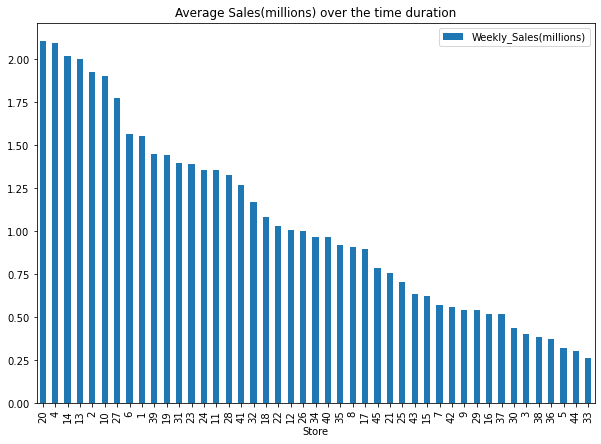

In [5]:
# Which store has the average highest sales 
avg_sales = df.groupby('Store')['Weekly_Sales(millions)'].mean('Weekly_Sales(millions)').reset_index()
# sales_per_store['Weekly_Sales'] =sales_per_store['Weekly_Sales'].round(2)


avg_sales.sort_values('Weekly_Sales(millions)',ascending= False).plot.bar(x='Store',y='Weekly_Sales(millions)',figsize =(10,7))
plt.title('Average Sales(millions) over the time duration')

In [6]:
#Top 5 Stores with good performance 
# topfive = df.query('Store in [20,4,14,13,2]')
# #bottem 5 Stores with good performance 
# botfive = df.query('Store in [38,36,5,44,33]')
# # print(topfive.describe()
# topfive.describe()

## Holiday vs Weekly Sales

Months that has Holidays:  [2, 9, 11, 12]


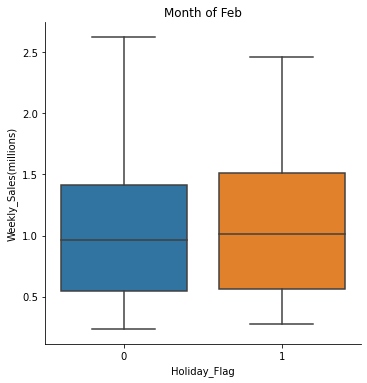

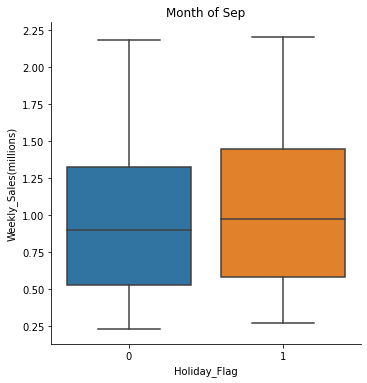

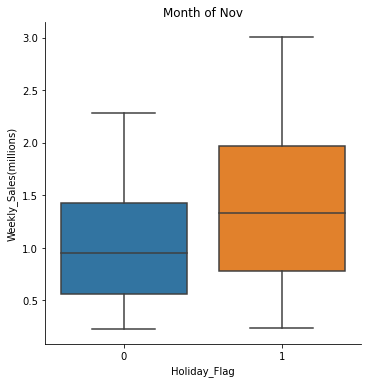

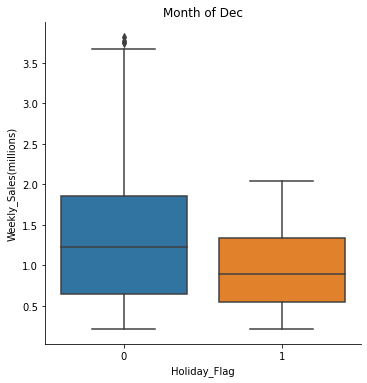

In [7]:
#how much does sales increase if that particular week has a public holiday
df['Year'] = df['Date'].str.slice(-4)
df['Date'] = pd.to_datetime(df['Date'], dayfirst= True)
df['Month'] =pd.DatetimeIndex(df['Date']).month
# df = df.sort_values('Date')
#filter 
print('Months that has Holidays: ',sorted(df[df['Holiday_Flag'] == 1]['Month'].unique()))

for i in sorted(df[df['Holiday_Flag'] == 1]['Month'].unique()):
    df_filtered = df.query(f'Month == {i}')
    month = dt.datetime.strptime(str(i), "%m").strftime("%b")
    sns.catplot(x="Holiday_Flag", y="Weekly_Sales(millions)", kind="box", data=df_filtered)
    plt.title(f'Month of {month}')
    


## Temperature and Weekly Sales

Lowest Temps:  -18.37
Highest Temps:  38.41


Text(0.5, 1.0, 'Temperature Vs Weekly Sales(millions) \n (In Various Months)')

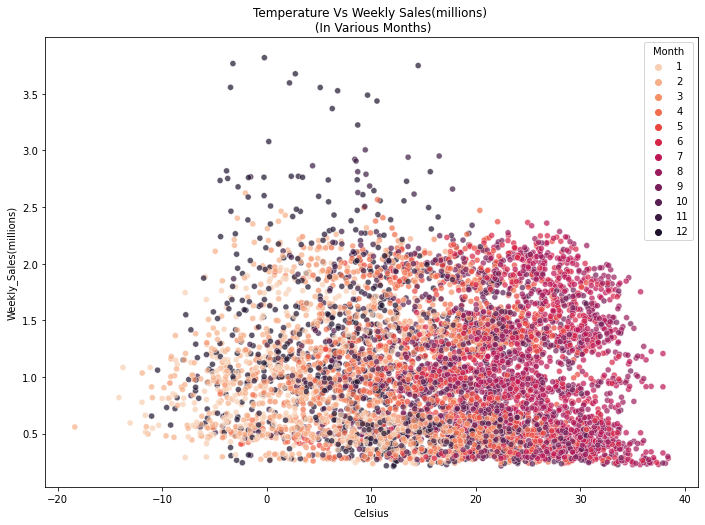

In [8]:
#Temperature and Weekly Sales

#convert Temps to degree celsius
df['Celsius'] = df['Temperature'].apply(lambda x: round((x -31)*(5/9),2))
print('Lowest Temps: ',df['Celsius'].min())
print('Highest Temps: ',df['Celsius'].max())
# df['Celsius'].hist(bins=10,alpha=0.7,figsize=(10,6))

#Create custom colors for visualisation
custom_palette = sns.color_palette("rocket_r",12).as_hex()
# print(custom_palette)
# sns.palplot(custom_palette)

color_dict= dict(zip(list(range(1,13)),custom_palette))

fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.scatterplot(data=df, x="Celsius", y="Weekly_Sales(millions)", hue="Month",palette=color_dict,alpha = 0.7)
plt.title('Temperature Vs Weekly Sales(millions) \n (In Various Months)')

## Fuel Vs Weekly Sales

In [9]:
df['Fuel_bins'] = pd.cut(df['Fuel_Price'],np.arange(2,5,0.5),include_lowest=True)

<AxesSubplot:xlabel='Fuel_bins', ylabel='Weekly_Sales(millions)'>

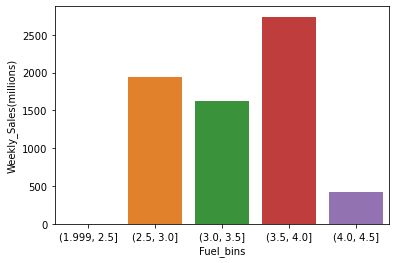

In [10]:
fuel_indic =df.groupby(['Fuel_bins'])['Weekly_Sales(millions)'].sum().reset_index()
sns.barplot(x='Fuel_bins',y='Weekly_Sales(millions)',data = fuel_indic)

# This looks odd when fuel prices hit 3.5-4.0 sales actually goes up.
# But look at the next charts!

<AxesSubplot:xlabel='Fuel_bins', ylabel='Weekly_Sales(millions)'>

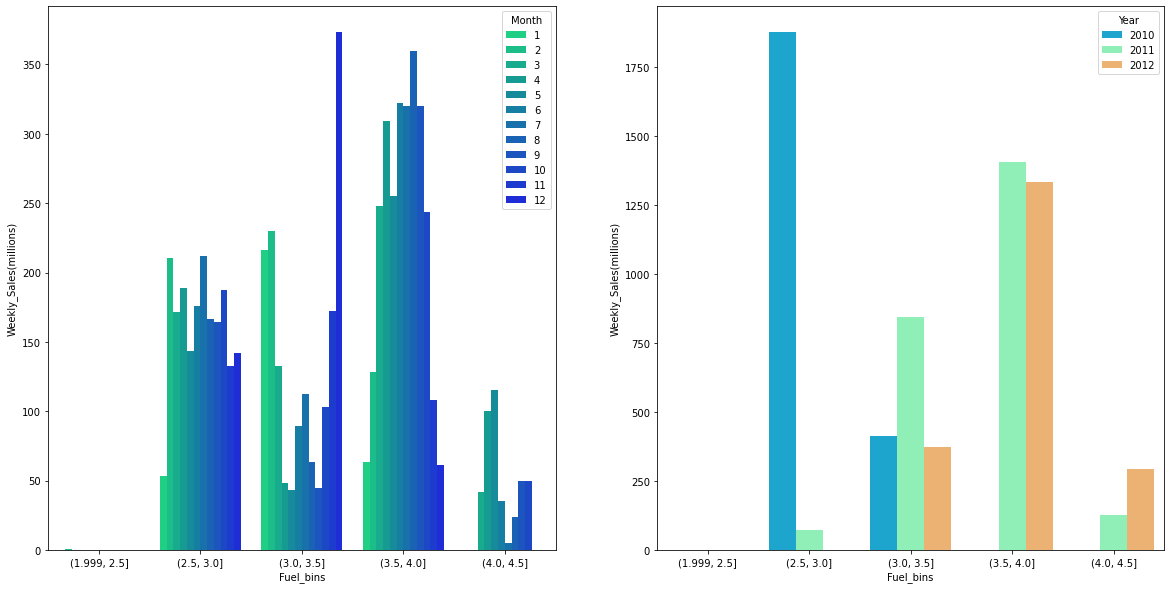

In [11]:
fig, ax =plt.subplots(1,2,figsize=(20,10))

fuel_indic =df.groupby(['Fuel_bins','Month'])['Weekly_Sales(millions)'].sum().reset_index()
sns.barplot(x='Fuel_bins',y='Weekly_Sales(millions)',hue='Month',data = fuel_indic,palette='winter_r',ax=ax[0]) 

fuel_indic =df.groupby(['Fuel_bins','Year'])['Weekly_Sales(millions)'].sum().reset_index()
sns.barplot(x='Fuel_bins',y='Weekly_Sales(millions)',hue='Year',data = fuel_indic,palette='rainbow',ax=ax[1])

In [12]:
print(df.query('Year == "2010"').shape[0])
print(df.query('Year == "2011"').shape[0])
print(df.query('Year == "2012"').shape[0])

2160
2340
1935


## CPI vs Weekly Sales

In [13]:
# Using np.linspace to find 3 equal breaks for CPI
np.linspace(df['CPI'].min(),df['CPI'].max(),4)

array([126.064    , 159.7869356, 193.5098712, 227.2328068])

In [14]:
df['CPI_bins'] = np.select([df['CPI'].between(126,159.999 ,inclusive = True),
                            df['CPI'].between(160,192.999 ,inclusive = True),
                            df['CPI']>193],
                            ['Low CPI','Mid CPI','High CPI'])

Text(0.5, 1.0, 'CPI Vs Weekly Sales')

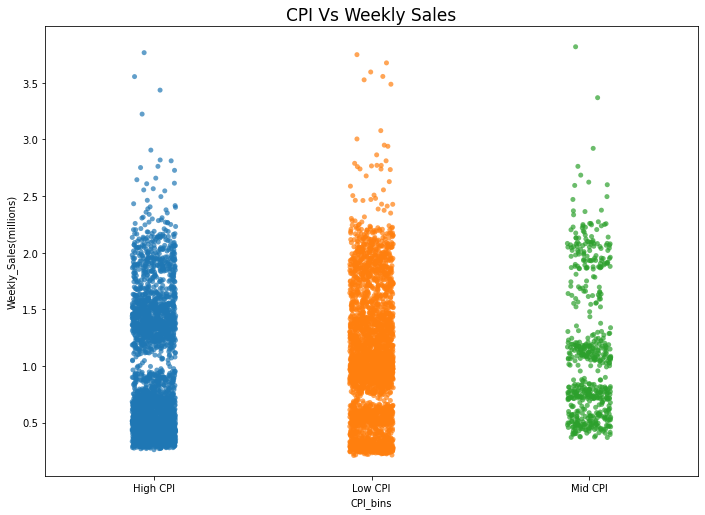

In [15]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
# sns.swarmplot(data=df, x="CPI_bins", y="Weekly_Sales(millions)",alpha = 0.7)
sns.stripplot(data=df, x="CPI_bins", y="Weekly_Sales(millions)",alpha = 0.7)
plt.title('CPI Vs Weekly Sales' ,fontsize = 17)

<AxesSubplot:xlabel='CPI_bins', ylabel='Weekly_Sales(millions)'>

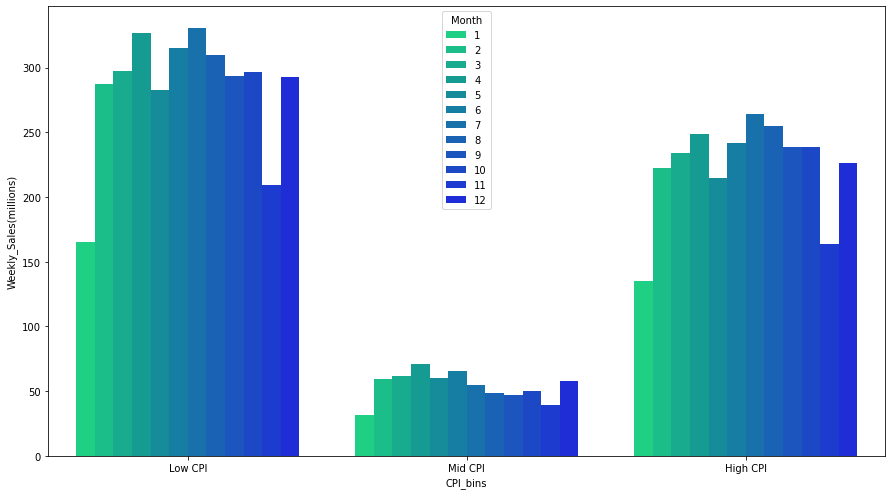

In [16]:
# fig, ax =plt.subplots(1,2,figsize=(20,10))
fig, ax = plt.subplots(figsize=(15, 8.27))
fuel_indic =df.groupby(['CPI_bins','Month'])['Weekly_Sales(millions)'].sum().reset_index()
sns.barplot(x='CPI_bins',y='Weekly_Sales(millions)',hue='Month',data = fuel_indic,palette='winter_r',order= ['Low CPI','Mid CPI','High CPI']) 

<AxesSubplot:xlabel='CPI_bins', ylabel='Weekly_Sales(millions)'>

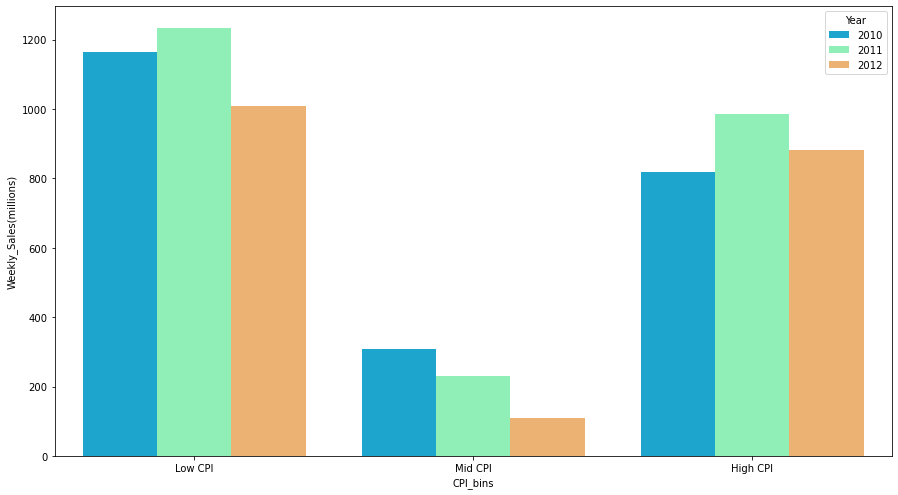

In [17]:
fig, ax = plt.subplots(figsize=(15, 8.27))
fuel_indic =df.groupby(['CPI_bins','Year'])['Weekly_Sales(millions)'].sum().reset_index()
sns.barplot(x='CPI_bins',y='Weekly_Sales(millions)',hue='Year',data = fuel_indic,palette='rainbow',order= ['Low CPI','Mid CPI','High CPI'])

In [18]:
print('CPI Count')
print("Low CPI: ",df.query('CPI_bins == "Low CPI"').shape[0])
print("Mid CPI: ",df.query('CPI_bins == "Mid CPI"').shape[0])
print("High CPI: ",df.query('CPI_bins == "High CPI"').shape[0])
print('*'*30)
print('CPI Range: \n',np.linspace(df['CPI'].min(),df['CPI'].max(),4))


CPI Count
Low CPI:  3146
Mid CPI:  578
High CPI:  2711
******************************
CPI Range: 
 [126.064     159.7869356 193.5098712 227.2328068]


## Unemployment VS Weekly Sales

In [19]:
#ranges between 3.879 to 14.313

# Using np.linspace to find 3 equal breaks for CPI
np.linspace(df['Unemployment'].min(),df['Unemployment'].max(),4)

df['Unemployment_bins'] = np.select([df['Unemployment'].between(3.879,7.999 ,inclusive = True),
                            df['Unemployment'].between(8,10.999 ,inclusive = True),
                            df['Unemployment']>11],
                            ['Low UE','Mid UE','High UE'])

Text(0.5, 1.0, 'Unemployment Vs Weekly Sales')

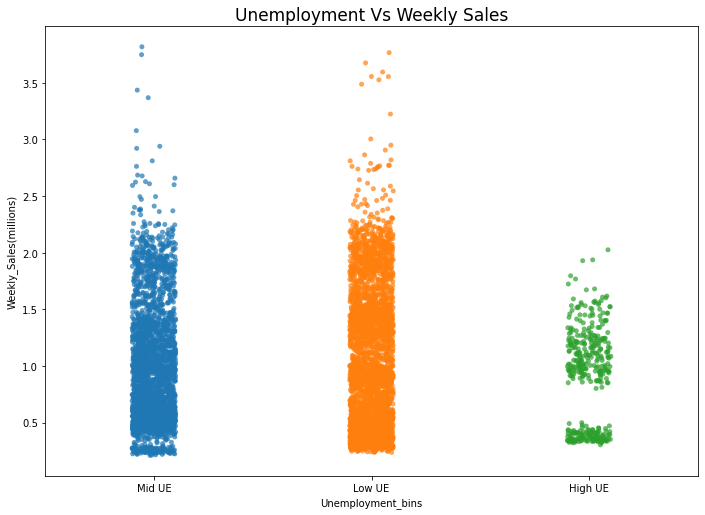

In [20]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.stripplot(data=df, x="Unemployment_bins", y="Weekly_Sales(millions)",alpha = 0.7)
plt.title('Unemployment Vs Weekly Sales' ,fontsize = 17)

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales(millions)'>

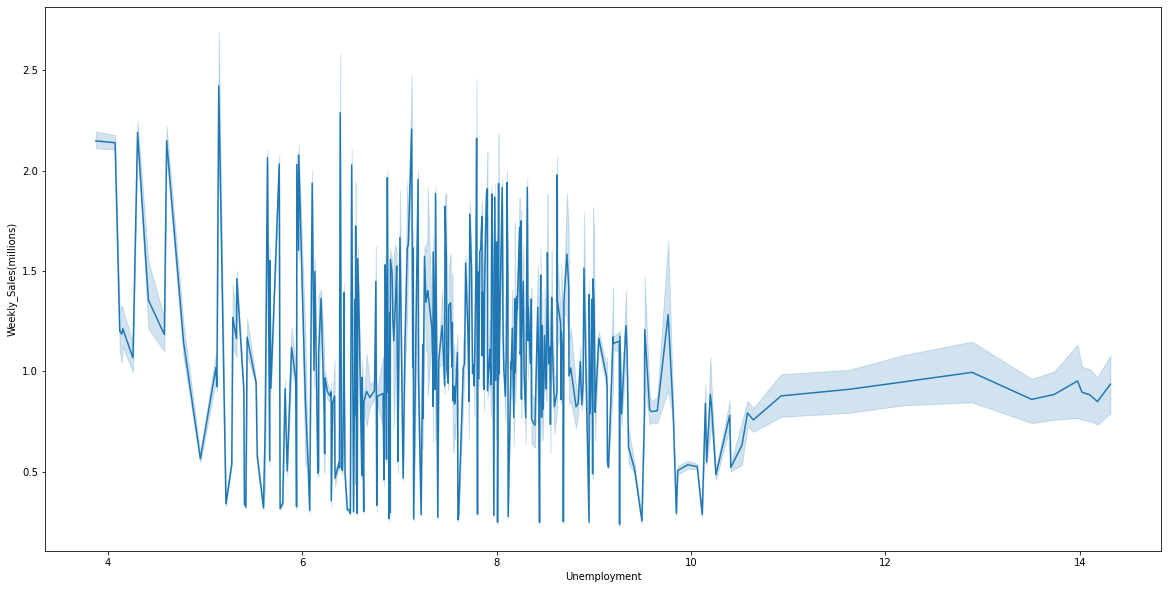

In [21]:
fig, ax =plt.subplots(figsize=(20,10))
sns.lineplot(data=df, x="Unemployment", y="Weekly_Sales(millions)")

<AxesSubplot:xlabel='Unemployment_bins', ylabel='Weekly_Sales(millions)'>

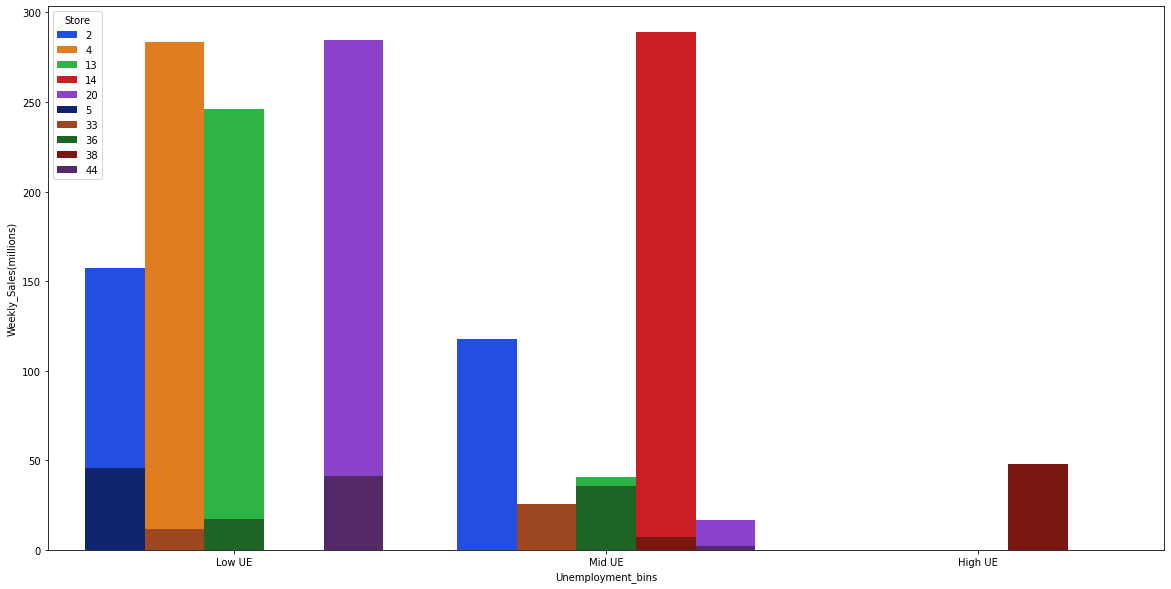

In [22]:
fig, ax =plt.subplots(figsize=(20,10))
UE_indic =df.groupby(['Unemployment_bins','Store'])['Weekly_Sales(millions)'].sum().reset_index()

#Recall that the top 5 stores were 20,4,14,13,2
#Bottem 5 store were 38,36,5,44,33
topfive = UE_indic.query('Store in [20,4,14,13,2]')
botfive = UE_indic.query('Store in [38,36,5,44,33]')

sns.barplot(x='Unemployment_bins',y='Weekly_Sales(millions)',hue='Store',data = topfive,palette='bright',order= ['Low UE','Mid UE','High UE'])

sns.barplot(x='Unemployment_bins',y='Weekly_Sales(millions)',hue='Store',data = botfive,palette='dark',order= ['Low UE','Mid UE','High UE'])


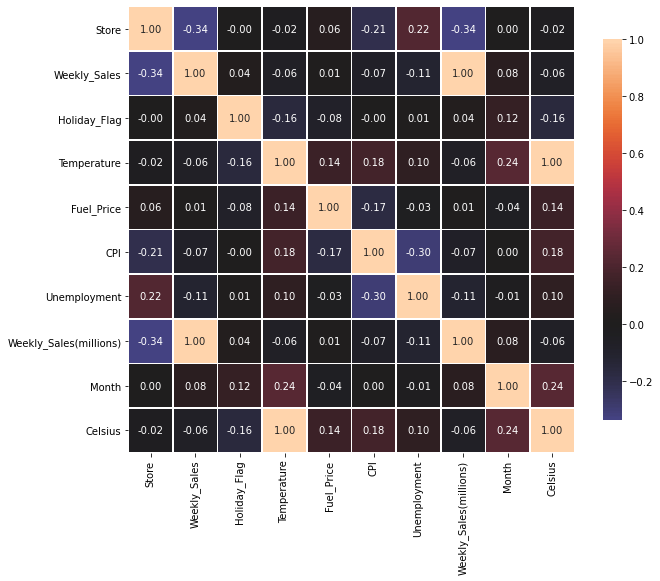

In [23]:
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

# Specific Implementation

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
X = df[['Store','Holiday_Flag','CPI','Unemployment']]
Y = df['Weekly_Sales(millions)']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [25]:
import statsmodels.api as sm

model = sm.OLS(Y, X)
results = model.fit()

#good practice to fit constant, other the linear regression is forced to go through the origin 0.
X =sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
predictions = results.predict(X) # make the predictions by the model

# Exercise 4: Print out the summary statistics.
summary = results.summary()
print(summary)

                              OLS Regression Results                              
Dep. Variable:     Weekly_Sales(millions)   R-squared:                       0.141
Model:                                OLS   Adj. R-squared:                  0.140
Method:                     Least Squares   F-statistic:                     263.1
Date:                    Sun, 08 Aug 2021   Prob (F-statistic):          1.02e-209
Time:                            12:22:50   Log-Likelihood:                -4961.5
No. Observations:                    6435   AIC:                             9933.
Df Residuals:                        6430   BIC:                             9967.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const   

In [26]:
#Step 1: Create Model Object
lm = LinearRegression(fit_intercept = True, normalize =False, copy_X = True,n_jobs=None)
#Step 2: Perform Fit
lm.fit(X_train, Y_train)
#Step 3: Perform Predictions on Test Set
Y_pred = lm.predict(X_test)
#Step 4 Accuracy Score
print('R Square',lm.score(X_train, Y_train))

print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))


# get importance
importance = lm.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


R Square 0.13801823854882833
Mean Squared Error: 0.2928864682819546
Feature: 0, Score: -0.01492
Feature: 1, Score: 0.07337
Feature: 2, Score: -0.00247
Feature: 3, Score: -0.02545


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Weekly_Sales(millions)'>

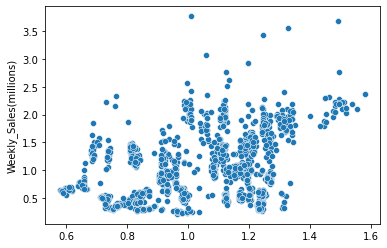

In [27]:
#Visualise what went wrong.
sns.scatterplot(Y_pred,Y_test)

In [28]:
#Try the next machine learning Algorithm

from sklearn.tree import DecisionTreeRegressor
#Step 1: Create Model Object
reg = DecisionTreeRegressor()
#Step 2: Perform Fit
reg.fit(X_train,Y_train)
#Step 3: Perform Predictions on Test Set
Y_pred = reg.predict(X_test)
#Step 4 Accuracy Score
print('R Square',reg.score(X_train, Y_train))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))


R Square 1.0
Mean Squared Error: 0.029209236292449495


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Weekly_Sales(millions)'>

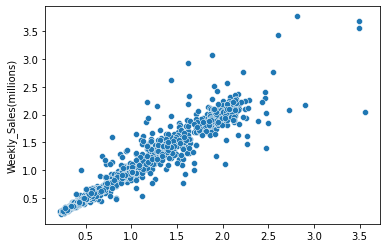

In [29]:
#Visualise prediction vs test
sns.scatterplot(Y_pred,Y_test)

# Conclusion

In [49]:
comparison = (pd.DataFrame(Y_pred,columns=['pred'])
            .join(Y_test
            .reset_index(drop= True))
            .sort_values(by='Weekly_Sales(millions)',ascending=False))

comparison['Difference'] = abs(comparison['Weekly_Sales(millions)'] - comparison['pred'])
comparison

,pred,Weekly_Sales(millions),Difference
979,2.819193,3.766687,0.947494
261,3.487987,3.676389,0.188402
1085,3.487987,3.556766,0.068779
763,2.609167,3.436008,0.826841
808,1.884344,3.078162,1.193818
...,...,...,...
453,0.265003,0.238915,0.026088
330,0.256091,0.236920,0.019171
568,0.231156,0.234218,0.003062
1179,0.265003,0.224807,0.040197


In [53]:
#Median position:
print('Median position: ',1287/2)

Median position:  643.5


Text(0.5, 1.0, 'Fluctuation above median differences \n Prediction Vs Weekly Sales')

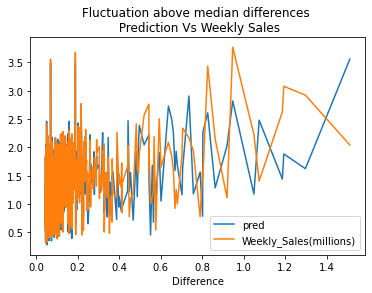

In [58]:
comparison.nlargest(644,'Difference').plot('Difference')
plt.title('Fluctuation above median differences \n Prediction Vs Weekly Sales')

Text(0.5, 1.0, 'Fluctuation below median position \n Prediction Vs Weekly Sales')

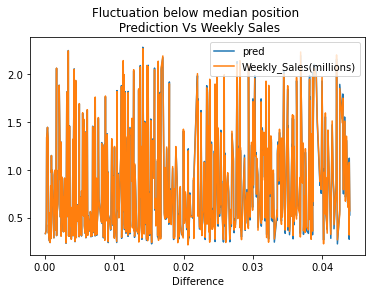

In [60]:
comparison.nsmallest(644,'Difference').plot('Difference')
plt.title('Fluctuation below median position \n Prediction Vs Weekly Sales')